# Section 36-Revisited: Support Vector Machines 

## Resources

- STUDY GROUP RECORDINGS:
    - [Support Vector Machines - Victor](https://www.youtube.com/watch?v=_QmnoubpU3Q&list=PLVoXE6pv5LIg4WOllQ4rNPi9BtvtVMb78&index=5)
    - [The Kernel Trick - Victor](https://www.youtube.com/watch?v=mnN74NI4Gqk&list=PLVoXE6pv5LIg4WOllQ4rNPi9BtvtVMb78&index=6)

##  Questions

-

In [1]:
from fsds_100719.imports import *

fsds_1007219  v0.7.4 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


['[i] Pandas .iplot() method activated.']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets as datasets

# Why Are Support Vector Machines Cool?

!["I support vector machines" t-shirt with vector machine boundary and margin depicted with data](images/i_support_vector_machines.jpg)

> Available now for [purchase](https://www.amazon.com/Support-Machines-Network-Machine-Learning/dp/B07XTLT7RL/ref=sr_1_2?dchild=1&keywords=i+support+vector+machines&qid=1579708346&s=apparel&sr=1-2) 😉

## Support Vector Machines

- **Supervised learning**
- Classification OR regression.
- We can sacrifice accuracy to get _better_ boundaries (and protect against outliers)

### Advantages
- Good for datasets with more variables than observations
- Robust against outliers

- Good performance
- Good off-the-shelf model in general for several scenarios
- Can approximate complex non-linear functions"

### Disadvantages
- Long training time required
- Tuning required to determine optimal kernel for non-linear SVMs

### Requirements
- Scaled features
- Null values filled


## Q: When would it be "better" to have a defined boundary over accuracy?

# Motivation

## Q: Look at these lines, which is a better model?



In [3]:
# Loading in an example dataset
plt.style.use('seaborn-notebook')
iris = datasets.load_iris()
iris_data = iris.data

# Only use two targets/classifications
iris_targets = np.where(iris.target == 0, 0, 1)

# Plotting different points
plt.scatter(x=iris_data[:,2], y=iris_data[:,1], c=iris_targets)

# Plotting lines to separate points
l1 = np.array([[1,2],[6.5,4.5]])
plt.plot(l1[:,0], l1[:,1], linestyle='--')
l2 = np.array([[2,2],[3.5,4.5]])
plt.plot(l2[:,0], l2[:,1], linestyle='--')

## Accuracy isn't everything

Could say each line classifies the same (accuracy), but you know there's more to it.

**Boundaries** are also important (think about overfitting)

### Q: How can we define a "better" boundary ?

> Use distances from the line

We can define this as the **margin**

In [4]:
# Plotting different points
plt.scatter(x=iris_data[:,2], y=iris_data[:,1], c=iris_targets)

# Plotting lines to separate points
plt.plot(l2[:,0], l2[:,1], linestyle='-')

# Small margin
margin_small = np.array([0.2,0])
l2_margin_pos_small = l2 + margin_small
l2_margin_neg_small = l2 - margin_small

margin_larger = np.array([0.5,0])
l2_margin_pos_big = l2 + margin_larger
l2_margin_neg_big = l2 - margin_larger

# Plot with margins
plt.plot(l2_margin_pos_small[:,0], l2_margin_pos_small[:,1], linestyle='--', color='orange')
plt.plot(l2_margin_neg_small[:,0], l2_margin_neg_small[:,1], linestyle='--', color='orange')
plt.plot(l2_margin_pos_big[:,0], l2_margin_pos_big[:,1], linestyle='--', color='red')
plt.plot(l2_margin_neg_big[:,0], l2_margin_neg_big[:,1], linestyle='--', color='red')

plt.xlim(1,5)

(1, 5)

#### Line Definitions/Legend
- Blue = Model
- Possible Margins:
    - orange
    - red
    
- Left and Right margins are called negative and positive hyperplanes

### Q: Which margin is better?

- A: The smaller the margin the more you're assuming your model is correct and the more likely it will be over-fit and not generalize well.

### Two Types of SVM Max-Margin Classifier


- two kinds of max-margin classifiers:
    - hard margin = no errors whatsoever
    - soft margin = allows for errors


## Where do we go from here?

We minimize the two kinds of error:
 - how many are "misclassified" 
 - how many are in bad boundary (within margin)
 

This gives us something like this:

$Error_{total} = Error_{classification} + Error_{margin}$
 

# Recall using a linear model

The errors closest to the line, get punished more! → increases error linear to parallel lines

+ $Wx + b = 0$
+ $Wx + b = 1$
+ $Wx + b = 2$

## Classification error

- We start from our margin to count the error (instead of the center)

## Margin error

- $E = |W|^2 = ||W_1||+||W_2|| + …$ 
    + big vs small margin (we want very large)
- $M = \frac{2}{||W||}$ 
    + inverse proportion, large margin → small error

Turns out to the same as the L2 Regularization!

## Gradient Descent to minimize

# Hyperparameter $C$ 

Gives us a way to decide on which line is better (even if classification is worse)

$Error_{total} = C \cdot Error_{classification} + Error_{margin}$



## Q: What happens if $C$ is very large? (What errors do we care about more?)

Big $C$ will give us smaller $C$ (we like small margins to avoid errors)

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-support-vector-machines-online-ds-ft-100719/master/images/new_SVM_C.png">

- A big value of C results in left figure where misclassification data points are highly punished.
- A small value of C (on the right) allows for misclassification while maximizing margins.

# Kernel Trick

When a simple model isn't good enough, extend to higher dimensions

## Higher Dimension

(consider a line with no good cut; extend to parabola)
(consider a 2D → 3D & EQUIVALENT making a higher degree polynomial)

We consider all the possible ways to combine:

2D → 5D
$x,y --> (x,y,x^2,xy,y^2)$

2d separator <-- Get a 4D separator

A kernel describes the mapping/transformation

With polynomial kernel, we get more options to try (vs linear)

# Kernel Discussion

> A **kernel** is really a way to split the data into different parts

A common one for SVMs is **RBF**

## RBF - Radius Basis Kernel

### Motivation

#### Intro Situation

Imagine two points and we defined, we can generate a function for each point
![](images/rbf_2_separated.png)

#### Intro Situation - One Function

![](images/rbf_2_combined.png)

#### Adding more points

![](images/rbf_3_combined.png)
![](images/rbf_3_all.png)

#### Q: What would it look like for 5 different points?

![](images/rbf_5_open.png)

#### Q: What about an additional point (not easily separable)?

![](images/rbf_6_open.png)

### How This Is Helpful?

> We can use the hills and valleys to separate the points!

Record the heights over each point for each RBF

This turns into a vector (higher dimensional space) → likely separable

Uses hyperplane to get the weights

![https://www.researchgate.net/figure/Figure-B16-Non-linear-classifier-using-Kernel-trick_fig13_324250451](images/kernel_trick_hyperdimensional.png)

## Note on Hyperparameter $\gamma$

$\gamma$ hyperparameter gives narrow/fat (big/small $\gamma$) 

This essentially allows us to get less/more overfitting

## Scikit Learn Example

> https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

Automatically created module for IPython interactive environment
The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


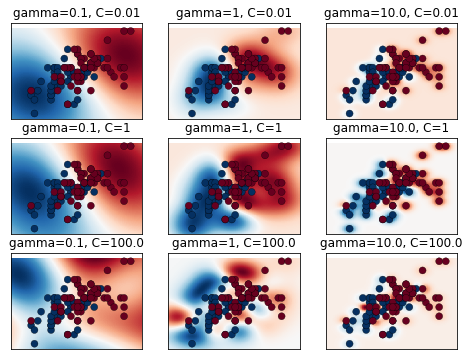

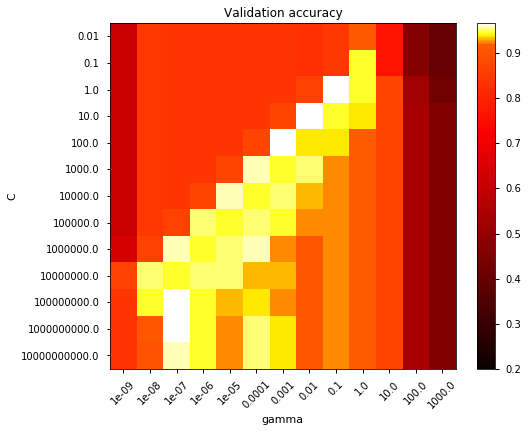

In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
#     plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
#               size='medium')
    plt.title(f"gamma={gamma}, C={C}")

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()



## Kernel Functions

Probably the most important information worth reviewing is some of the various kernel functions that you can apply:

1. Radial Basis Functions (RBF)
    1. `c`
    2. $\gamma$, which can be specified using `gamma` in scikit-learn
2. Polynomial Kernel
    1. $\gamma$, which can be specified using `gamma` in scikit-learn
    2. $r$, which can be specified using `coef0` in scikit-learn
    3. $d$, which can be specified using `degree` in scikit-learn
3. Sigmoid Kernel
    1. $\gamma$, which can be specified using `gamma` in scikit-learn
    2. $r$, which can be specified using `coef0` in scikit-learn

Also recall that in general, `c` is the parameter for balancing standard accuracy metrics for tuning classifiers versus the decision boundary distance.


# Back to Our Iowa Prisoners

In [6]:
import plotly.express as px
import plotly.graph_objects as go

from fsds_100719.imports import *

In [7]:
prisoners = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/iowa_recidivism_renamed.csv"
df = pd.read_csv(prisoners,index_col=0)
df.head()
# df.to_csv('datasets/iowa_prisoners_unprocessed.csv', index=False)

yr_released        race_ethnicity age_released crime_class crime_type  \
0         2010  Black - Non-Hispanic        25-34    C Felony    Violent   
1         2010  White - Non-Hispanic        25-34    D Felony   Property   
2         2010  White - Non-Hispanic        35-44    B Felony       Drug   
3         2010  White - Non-Hispanic        25-34    B Felony      Other   
4         2010  Black - Non-Hispanic        35-44    D Felony    Violent   

    crime_subtype                  release_type super_dist recidivist  \
0         Robbery                        Parole        7JD        Yes   
1           Theft  Discharged – End of Sentence        NaN        Yes   
2     Trafficking                        Parole        5JD        Yes   
3  Other Criminal                        Parole        6JD         No   
4         Assault  Discharged – End of Sentence        NaN        Yes   

  target_pop   sex  
0        Yes  Male  
1         No  Male  
2        Yes  Male  
3        Yes  Male  
4         No  Male

In [8]:
## APPLYING SAME PRE-PROCESSING AS PRIOR CLASS
df= df.drop(columns=['yr_released'])
drop_cols = ['race_ethnicity','age_released','sex']
df = df.dropna(subset=drop_cols)
df.isna().sum()
df =  df.fillna('missing')
df.isna().sum()

race_ethnicity    0
age_released      0
crime_class       0
crime_type        0
crime_subtype     0
release_type      0
super_dist        0
recidivist        0
target_pop        0
sex               0
dtype: int64

In [9]:
age_map = {'25-34':30, '35-44':40,
           'Under 25': 20,
           '45-54':50,
           '55 and Older': 60}

df['age_released'] = df['age_released'].map(age_map)
df['age_released'].value_counts()

30    9543
40    6217
20    4585
50    4340
60    1302
Name: age_released, dtype: int64

In [10]:
df.head()

race_ethnicity  age_released crime_class crime_type   crime_subtype  \
0  Black - Non-Hispanic            30    C Felony    Violent         Robbery   
1  White - Non-Hispanic            30    D Felony   Property           Theft   
2  White - Non-Hispanic            40    B Felony       Drug     Trafficking   
3  White - Non-Hispanic            30    B Felony      Other  Other Criminal   
4  Black - Non-Hispanic            40    D Felony    Violent         Assault   

                   release_type super_dist recidivist target_pop   sex  
0                        Parole        7JD        Yes        Yes  Male  
1  Discharged – End of Sentence    missing        Yes         No  Male  
2                        Parole        5JD        Yes        Yes  Male  
3                        Parole        6JD         No        Yes  Male  
4  Discharged – End of Sentence    missing        Yes         No  Male

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25987 entries, 0 to 26019
Data columns (total 10 columns):
race_ethnicity    25987 non-null object
age_released      25987 non-null int64
crime_class       25987 non-null object
crime_type        25987 non-null object
crime_subtype     25987 non-null object
release_type      25987 non-null object
super_dist        25987 non-null object
recidivist        25987 non-null object
target_pop        25987 non-null object
sex               25987 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [12]:
df_ = df.copy()

### Label Encoding for EDA

In [13]:
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes('O').columns
cat_cols

Index(['race_ethnicity', 'crime_class', 'crime_type', 'crime_subtype',
       'release_type', 'super_dist', 'recidivist', 'target_pop', 'sex'],
      dtype='object')

In [14]:
encoders = {}
for col in cat_cols:
    encoders[col]  = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25987 entries, 0 to 26019
Data columns (total 10 columns):
race_ethnicity    25987 non-null int64
age_released      25987 non-null int64
crime_class       25987 non-null int64
crime_type        25987 non-null int64
crime_subtype     25987 non-null int64
release_type      25987 non-null int64
super_dist        25987 non-null int64
recidivist        25987 non-null int64
target_pop        25987 non-null int64
sex               25987 non-null int64
dtypes: int64(10)
memory usage: 2.2 MB


In [15]:
mpl.rcParams['figure.figsize'] =(20,20)
# pd.plotting.scatter_matrix(df);

In [16]:
px.scatter_matrix(df, color='recidivist')

In [17]:
px.scatter_matrix(df,color='recidivist',
                 dimensions=['race_ethnicity','super_dist','age_released',
                            'target_pop','crime_class','crime_class'])

In [18]:
# df.to_csv('datasets/iowa_prisoners_processed.csv', index=False)
for col,enc in encoders.items():
    df[col] = enc.inverse_transform(df[col])
df.head()

race_ethnicity  age_released crime_class crime_type   crime_subtype  \
0  Black - Non-Hispanic            30    C Felony    Violent         Robbery   
1  White - Non-Hispanic            30    D Felony   Property           Theft   
2  White - Non-Hispanic            40    B Felony       Drug     Trafficking   
3  White - Non-Hispanic            30    B Felony      Other  Other Criminal   
4  Black - Non-Hispanic            40    D Felony    Violent         Assault   

                   release_type super_dist recidivist target_pop   sex  
0                        Parole        7JD        Yes        Yes  Male  
1  Discharged – End of Sentence    missing        Yes         No  Male  
2                        Parole        5JD        Yes        Yes  Male  
3                        Parole        6JD         No        Yes  Male  
4  Discharged – End of Sentence    missing        Yes         No  Male

In [19]:
## Encode categorical features
df = pd.get_dummies(df, drop_first=True,
                    columns=df.drop(columns='age_released').columns)
df

age_released  \
0                30   
1                30   
2                40   
3                30   
4                40   
...             ...   
26015            20   
26016            40   
26017            30   
26018            30   
26019            40   

       race_ethnicity_American Indian or Alaska Native - Non-Hispanic  \
0                                                      0                
1                                                      0                
2                                                      0                
3                                                      0                
4                                                      0                
...                                                  ...                
26015                                                  0                
26016                                                  0                
26017                                                  0                
26018                                                  0                
26019                                                  0                

       race_ethnicity_Asian or Pacific Islander - Hispanic  \
0                                                      0     
1                                                      0     
2                                                      0     
3                                                      0     
4                                                      0     
...                                                  ...     
26015                                                  0     
26016                                                  0     
26017                                                  0     
26018                                                  0     
26019                                                  0     

       race_ethnicity_Asian or Pacific Islander - Non-Hispanic  \
0                                                      0         
1                                                      0         
2                                                      0         
3                                                      0         
4                                                      0         
...                                                  ...         
26015                                                  0         
26016                                                  0         
26017                                                  0         
26018                                                  0         
26019                                                  0         

       race_ethnicity_Black -  race_ethnicity_Black - Hispanic  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   
...                       ...                              ...   
26015                       0                                0   
26016                       0                                0   
26017                       0                                0   
26018                       0                                0   
26019                       0                                0   

       race_ethnicity_Black - Non-Hispanic  race_ethnicity_N/A -  \
0                                        1                     0   
1                                        0                     0   
2                                        0                     0   
3                                        0                     0   
4                                        1                     0   
...                                    ...                   ...   
26015                                    0    

In [20]:
df.shape

(25987, 78)

In [21]:
from sklearn.model_selection import train_test_split
y = df['recidivist_Yes']
X = df.drop(columns=['recidivist_Yes'])

## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

## Check target class counts
print(pd.Series(y_train).value_counts(normalize=True) )
pd.Series(y_test).value_counts(normalize=True)


0    0.666393
1    0.333607
Name: recidivist_Yes, dtype: float64


0    0.664614
1    0.335386
Name: recidivist_Yes, dtype: float64

In [22]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [23]:
smote = SMOTE()
X_train,y_train = smote.fit_sample(X_train,y_train)
## Check target class counts
print(pd.Series(y_train).value_counts(normalize=True) )
pd.Series(y_test).value_counts(normalize=True)


1    0.5
0    0.5
Name: recidivist_Yes, dtype: float64


0    0.664614
1    0.335386
Name: recidivist_Yes, dtype: float64

## Support Vector Machines

In [24]:
import py_files.mod_5_functions as m5

In [25]:
from sklearn.svm import SVC, 

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-25-3a0bfcb53ae1>, line 1)

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

In [ ]:
y_hat_test = svc.predict(X_test)

m5.evaluate_model(y_test,y_hat_test,svc,conf_matrix_kws={'normalize':True})

In [ ]:
# svc.coef0

## Cross Val

In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
timer = m5.Timer()

cv_scores = cross_val_score(svc,X,y)
print(f"CV Scores:\n{cv_scores}\n\tMean Score: {np.mean(cv_scores)}")
y_hat_pred_cv = cross_val_predict(svc,X_test,y_test)
# svc.score(X_test,y_test)
timer.stop()

In [ ]:
m5.evaluate_model(y_test,y_hat_pred_cv,conf_matrix_kws={'normalize':False})

# Let's peak inside this black box
[SHAP Values](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)

[Explain Any Model with SHAP KernelExplaibner](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

In [ ]:
fs.reload(m5)

In [ ]:
# !pip install -U shap
import shap


In [ ]:
X_shap = shap.sample(X_test,nsamples=5)
explainer = shap.KernelExplainer(svc.predict,X_shap)#.shap_values()
shap_values = explainer.shap_values(X_shap)
# # # rf_shap_values = shap.KernelExplainer(rf.predict,X_test)

In [ ]:
shap.summary_plot(shap_values,X_shap)

In [ ]:
shap.initjs()

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, X_shap)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, X_test)